Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       381
           1       0.99      0.96      0.97       419

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800

Confusion Matrix:
[[375   6]
 [ 17 402]]


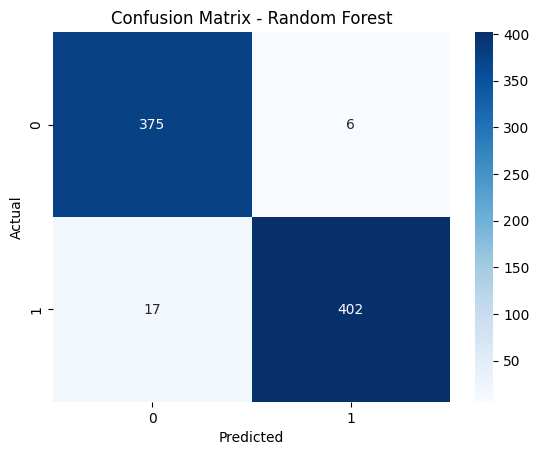

ROC AUC Score: 1.00


In [8]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
url = 'https://raw.githubusercontent.com/ElvisMan2/taller_movil/main/Chronic_Kidney_Dsease_data_new.csv'
data = pd.read_csv(url)

# Eliminar columnas irrelevantes
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

# Separar características (X) y variable objetivo (y)
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Imprimir reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Imprimir matriz de confusión
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualizar matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Calcular y mostrar ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.2f}")
